School A: (20.250289234141295, 12.844029502490006, 36.595984547119826)
School B: (195.0640431299434, 123.72210074964968, 352.51648139655975)
School C: (98.40303539965868, 62.41350309589192, 177.83232235538486)


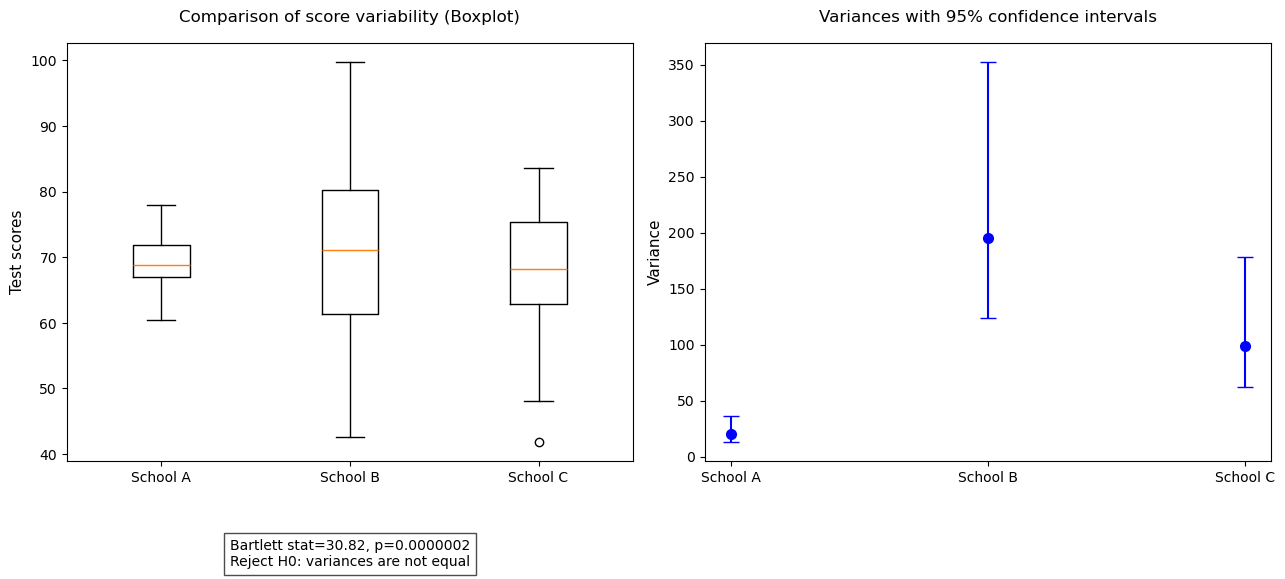

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate example data (math test scores in 3 schools)
school_A = np.random.normal(loc=70, scale=5, size=30)    # low variance
school_B = np.random.normal(loc=72, scale=15, size=30)   # high variance
school_C = np.random.normal(loc=68, scale=10, size=30)   # medium variance

# 2. Bartlett's test for homogeneity of variances
stat, p_value = stats.bartlett(school_A, school_B, school_C)

# 3. Hypothesis testing
alpha = 0.05
test_result = "Reject H0: variances are not equal" if p_value < alpha else "Fail to reject H0: variances are equal"

# 4. Confidence intervals for variance
def ci_variance(data, alpha=0.05):
    n = len(data)
    df = n - 1
    sample_var = np.var(data, ddof=1)
    chi2_low = stats.chi2.ppf(1 - alpha/2, df)
    chi2_high = stats.chi2.ppf(alpha/2, df)
    lower = (df * sample_var) / chi2_low
    upper = (df * sample_var) / chi2_high
    return sample_var, lower, upper

cis = {
    "School A": ci_variance(school_A),
    "School B": ci_variance(school_B),
    "School C": ci_variance(school_C)
}

for key, value in cis.items():
    print(f"{key}: {value}")

# 5. VISUALIZATION
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# 5.1. Boxplot to compare distributions
axes[0].boxplot([school_A, school_B, school_C], labels=["School A", "School B", "School C"])
axes[0].set_title("Comparison of score variability (Boxplot)", fontsize=12, pad=15)
axes[0].set_ylabel("Test scores", fontsize=11)

# Test result displayed below the plot
axes[0].annotate(f"Bartlett stat={stat:.2f}, p={p_value:.7f}\n{test_result}",
                 xy=(0.5, -0.25), xycoords="axes fraction",
                 ha="center", fontsize=10, bbox=dict(facecolor="white", alpha=0.7))

# 5.2. Variances with 95% confidence intervals
labels = list(cis.keys())
variances = [cis[k][0] for k in labels]
lower_ci = [cis[k][1] for k in labels]
upper_ci = [cis[k][2] for k in labels]

yerr = [np.array(variances) - np.array(lower_ci), np.array(upper_ci) - np.array(variances)]

axes[1].errorbar(labels, variances, yerr=yerr, fmt='o', capsize=6, markersize=7, color="blue")
axes[1].set_title("Variances with 95% confidence intervals", fontsize=12, pad=15)
axes[1].set_ylabel("Variance", fontsize=11)

plt.tight_layout()
plt.show()